# 1. Import Libraries

In [8]:
!pip install mplfinance > NUL 2>&1
!pip install pandas-ta  > NUL 2>&1

In [9]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
import warnings
warnings.filterwarnings("ignore")

# 2. Dataset Preparation

In [12]:
data = pd.read_csv('google_stock_data.csv')

In [13]:
data.head()

,Date,Close,High,Low,Open,Volume
0,NaN,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,2020-06-04,70.3785171508789,71.72309429138843,69.96599205492319,71.4971694316438,26982000
2,2020-06-05,71.65840148925781,71.9709103787135,70.0461071028752,70.44520002096422,42642000
3,2020-06-08,72.05748748779297,72.10525562528537,70.88509140875318,70.974667107052,33878000
4,2020-06-09,72.25852966308594,73.04079279119881,71.77484210279437,71.91816171630913,33624000


In [14]:
data.drop(0, axis=0, inplace=True)

data.reset_index(drop=True, inplace=True)

In [15]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2020-06-04,70.3785171508789,71.72309429138843,69.96599205492319,71.4971694316438,26982000
1,2020-06-05,71.65840148925781,71.9709103787135,70.0461071028752,70.44520002096422,42642000
2,2020-06-08,72.05748748779297,72.10525562528537,70.88509140875318,70.974667107052,33878000
3,2020-06-09,72.25852966308594,73.04079279119881,71.77484210279437,71.91816171630913,33624000
4,2020-06-10,72.88652801513672,73.28810385800969,72.37198974644225,72.72778683921254,31762000


In [16]:
start_date = min(data['Date'])

end_date = max(data['Date'])

print(f"Data Range: {start_date} to {end_date}")

Data Range: 2020-06-04 to 2025-06-02


# 3. Preprocessing

## 3-1. Check Column Data Types

In [19]:
data.dtypes

Date      object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [20]:
data[["Close", "High", "Low", "Open"]] = data[["Close", "High", "Low", "Open"]].astype(float)

data[["Volume"]] = data[["Volume"]].astype(int)

In [21]:
data.dtypes

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int32
dtype: object

## 3-2. Check Missing Values

In [23]:
data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

<div class="alert alert-block alert-info">
<b>Number of Missing Values: </b>0
</div>

## 3-3. Check Noises

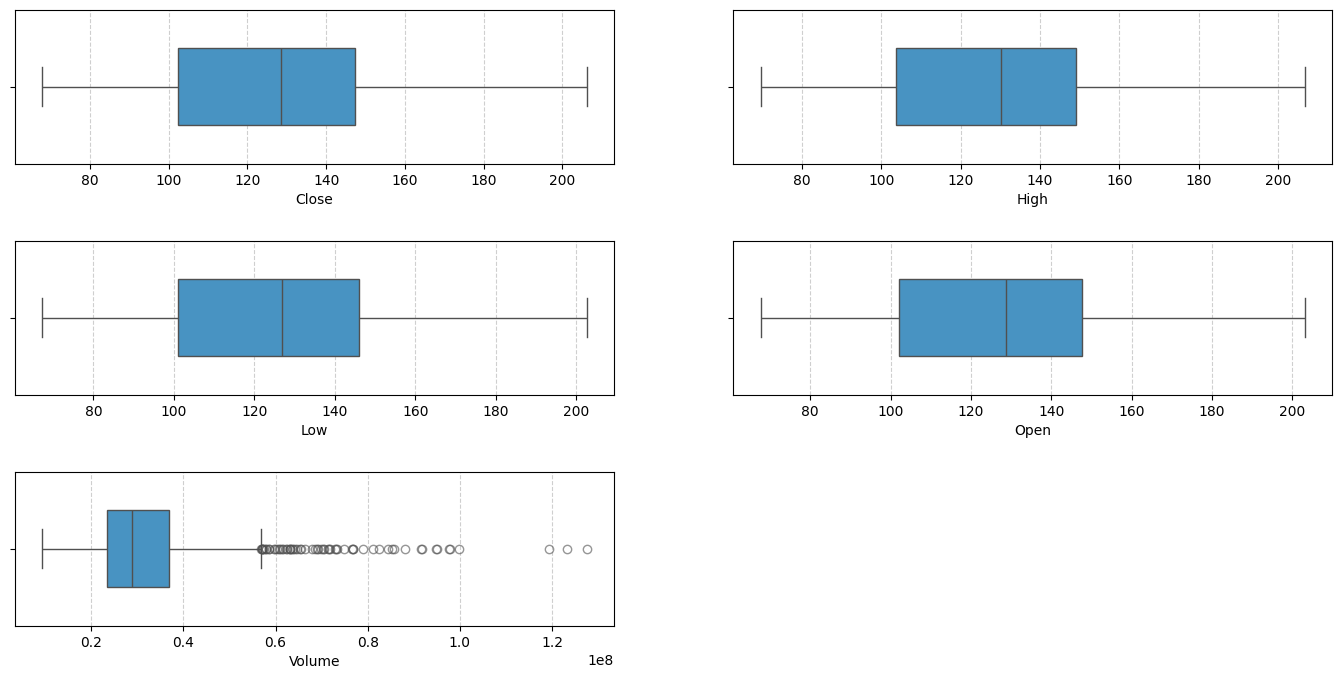

In [26]:
columns = ["Close", "High", "Low", "Open", "Volume"]

plt.figure(figsize = (17,8))

for i, column in enumerate(columns):
    
    plt.subplot(3,2,i+1)
    sns.boxplot(x = column,
                data = data,
                width = 0.5,
                color = '#3498D6',
                flierprops = {'alpha': 0.6})

    plt.grid(axis='x', linestyle='--', alpha=0.6)
    
plt.subplots_adjust(hspace = 0.5)      
plt.show()

<div class="alert alert-block alert-info">
<b>Number of Noises: </b>0<br/>
The data no noticeable noise.
</div>

## 3-4. Visualization

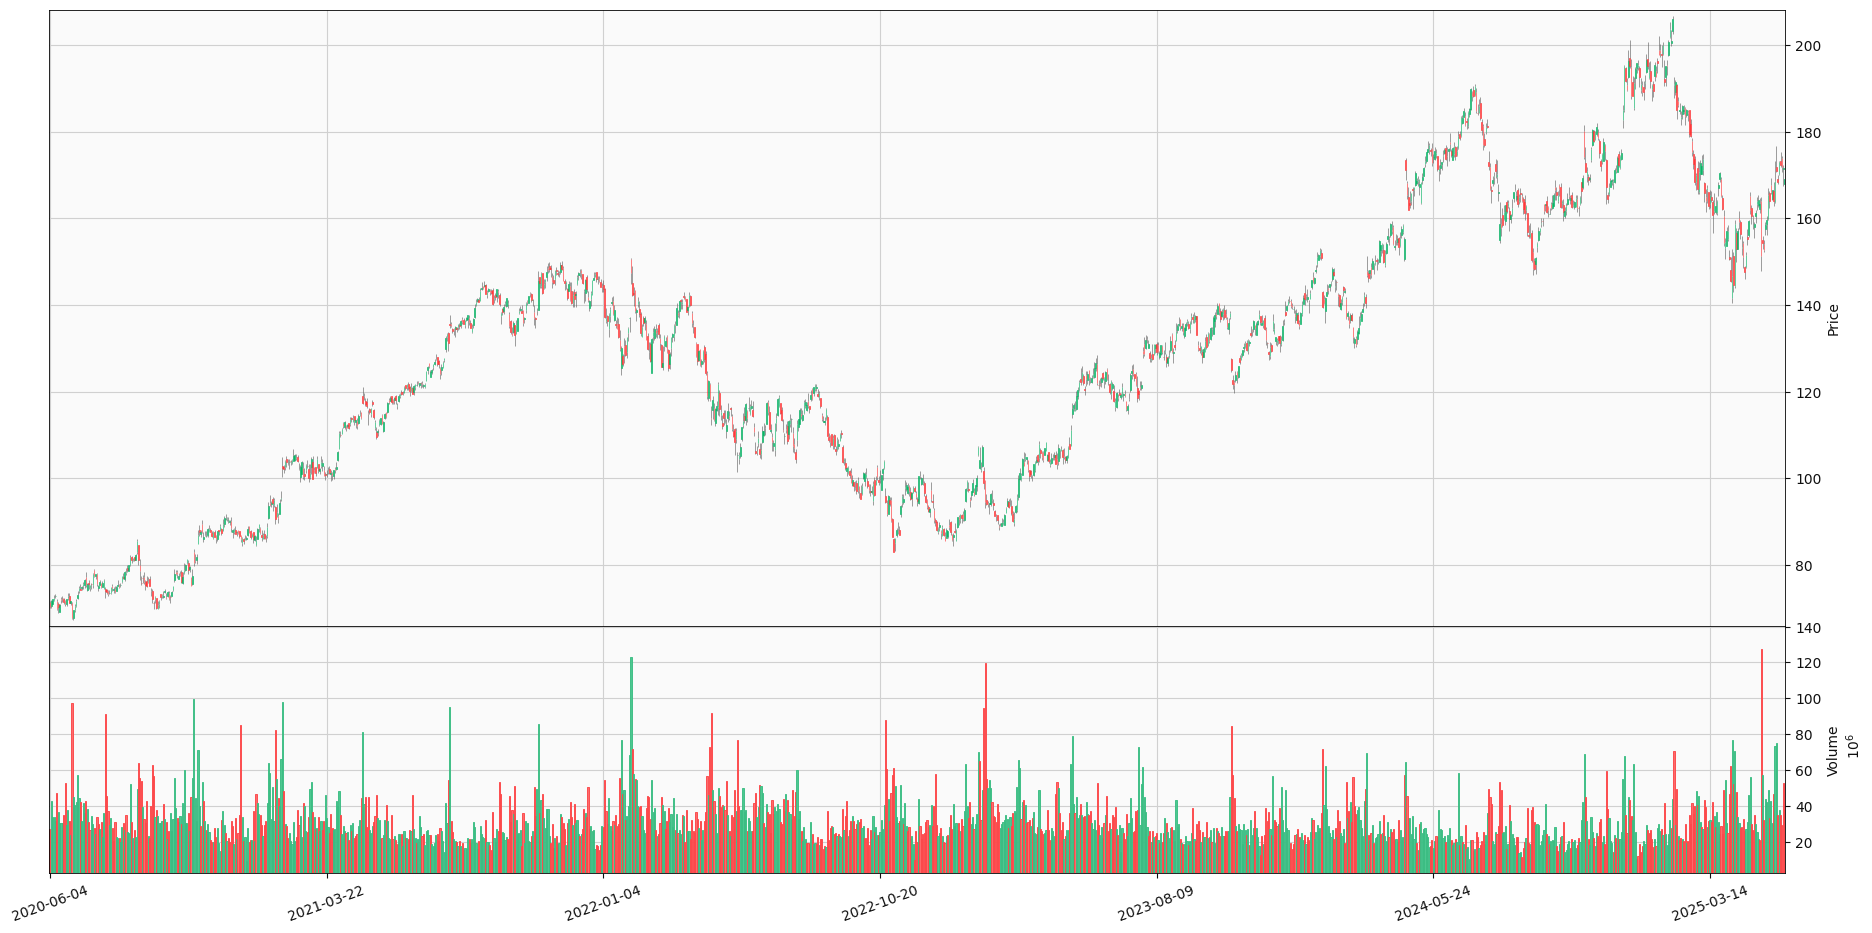

In [42]:
temp_df = data.copy()
temp_df["Date"] = pd.to_datetime(temp_df["Date"])
temp_df = temp_df.set_index("Date")

fig, axes = mpf.plot(
    temp_df,
    type='candle',
    volume=True,
    style='yahoo',
    ylabel='Price',
    ylabel_lower='Volume',
    figsize=(20, 10),
    datetime_format='%Y-%m-%d',
    xrotation=20,
    show_nontrading=False,
    returnfig=True,
    tight_layout=True
)

for ax in [axes[0], axes[2]]:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.6)

plt.show()

## 3-5. Feature Engineering

In [44]:
# SMA
data["SMA_14"] = ta.sma(data["Close"], length=14)
data["SMA_26"] = ta.sma(data["Close"], length=26)
data["SMA_50"] = ta.sma(data["Close"], length=50)

# EMA
data["EMA_14"] = ta.ema(data["Close"], length=14)
data["EMA_26"] = ta.ema(data["Close"], length=26)
data["EMA_50"] = ta.ema(data["Close"], length=50)

# RSI
data["RSI_14"] = ta.rsi(data["Close"], length=14)
data["RSI_26"] = ta.rsi(data["Close"], length=26)
data["RSI_50"] = ta.rsi(data["Close"], length=50)

# Bollinger Bands (20 و 50 روزه)
bb14 = ta.bbands(data["Close"], length=14, std=2)
bb26 = ta.bbands(data["Close"], length=26, std=2)
bb50 = ta.bbands(data["Close"], length=50, std=2)
data = pd.concat([data, bb14, bb26, bb50], axis=1)

In [45]:
data.drop('Date', axis=1, inplace=True)

data.dropna(inplace=True)

data.reset_index(drop=True, inplace=True)

In [46]:
data.head()

,Close,High,Low,Open,Volume,SMA_14,SMA_26,SMA_50,EMA_14,EMA_26,...,BBL_26_2.0,BBM_26_2.0,BBU_26_2.0,BBB_26_2.0,BBP_26_2.0,BBL_50_2.0,BBM_50_2.0,BBU_50_2.0,BBB_50_2.0,BBP_50_2.0
0,74.873535,75.627932,74.593373,75.320396,21942000,74.635423,75.327519,73.693386,74.769403,74.542710,...,72.937008,75.327519,77.718031,6.346981,0.405045,69.180274,73.693386,78.206499,12.248352,0.630747
1,75.451271,75.826484,74.891949,75.437839,19990000,74.680174,75.283939,73.769244,74.860319,74.610010,...,72.945931,75.283939,77.621947,6.211174,0.535785,69.268012,73.769244,78.270476,12.203546,0.686841
2,77.418869,77.497989,75.721486,75.942924,28378000,74.794876,75.367290,73.876471,75.201459,74.818074,...,72.889478,75.367290,77.845103,6.575298,0.913990,69.288850,73.876471,78.464093,12.419709,0.886082
3,76.863029,78.069762,76.633627,77.255152,30472000,74.817055,75.412747,73.968561,75.423002,74.969552,...,72.871031,75.412747,77.954463,6.740813,0.785296,69.329974,73.968561,78.607149,12.542050,0.811999
4,78.437492,78.632559,76.357934,76.632121,26382000,75.130912,75.526376,74.079581,75.824934,75.226437,...,72.730761,75.526376,78.321991,7.403017,1.020658,69.286749,74.079581,78.872412,12.939683,0.954628


<div class="alert alert-block alert-info">
<b>24 new features</b> from <b>technical indicators</b> have been <b>added</b> to the <b>data</b>.
</div>

## 3-6. Input–Output Sequence Creation

In [53]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data)

In [55]:
x, y = [], []
lookback = 50
forecast = 10

for i in range(lookback, len(scaled_data) - forecast):
    x.append(scaled_data[i - lookback:i])
    y.append(scaled_data[i:i + forecast, 0])

In [57]:
x = np.array(x)

y = np.array(y)
y = y.reshape((y.shape[0], 10, 1))

<div class="alert alert-block alert-info">
Data is <b>scaled</b> with <b>MinMaxScaler</b>.<br/>
Sequences of <b>50 past days</b> are used to predict the <b>next 10 days</b> of <b>close price</b>. <br/>
Converted to NumPy arrays for modeling.
</div>

## 3-7. Data Partitioning

In [61]:
# 5% for Test
x_test, y_test = x[-58:], y[-58:]

# 95% for Train and Validation
x_train_val, y_train_val = x[:-58], y[:-58]

In [63]:
x_train_val_shuffled, y_train_val_shuffled = shuffle(x_train_val, y_train_val, random_state=42)

# 90% for Train
x_train, y_train = x_train_val_shuffled[:-58], y_train_val_shuffled[:-58]

# 5% for Validation
x_val, y_val = x_train_val_shuffled[-58:], y_train_val_shuffled[-58:]

In [65]:
y_train = y_train.reshape((y_train.shape[0], 10, 1))
y_val   = y_val  .reshape((y_val.shape[0],   10, 1))
y_test  = y_test .reshape((y_test.shape[0],  10, 1))

In [76]:
print(f'Number of Train Data: {len(x_train)}')
print(f'Number of Validation Data: {len(x_val)}')
print(f'Number of Test Data: {len(x_test)}')

Number of Train Data: 1029
Number of Validation Data: 58
Number of Test Data: 58


<div class="alert alert-block alert-info">
<b>5%</b> of the last data was used for <b>testing</b>.<br/>
The remaining <b>95%</b> was allocated for <b>training</b> and <b>validation</b>.<br/>
Then, after <b>shuffling</b>, <b>90%</b> of the total data was used for <b>training</b> and <b>5%</b> for <b>validation</b>.
</div>

# 4. Modeling

## 4-1. Build Model

In [81]:
# The model is based on an LSTM Encoder–Decoder architecture.

def build_model(timesteps_in, timesteps_out, n_features):

    # Encoder
    encoder_inputs = layers.Input(shape=(timesteps_in, n_features))
    encoder_lstm = layers.LSTM(256, activation='tanh', return_state=True, dropout=0, recurrent_dropout=0)
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = layers.RepeatVector(timesteps_out)(encoder_outputs)
    decoder_lstm = layers.LSTM(256, activation='tanh', return_sequences=True, dropout=0, recurrent_dropout=0)
    decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)

    # Output Layer
    decoder_dense = layers.TimeDistributed(layers.Dense(1, activation='linear'))
    decoder_outputs = decoder_dense(decoder_outputs)

    # Build Model
    model = models.Model(encoder_inputs, decoder_outputs)
    
    return model

In [83]:
timesteps_in = 50
timesteps_out = 10
n_features = x_train.shape[2]

model = build_model(timesteps_in, timesteps_out, n_features)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 50, 29)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_2 (LSTM)                 │ [(None, 256), (None,      │         292,864 │ input_layer_1[0][0]        │
│                               │ 256), (None, 256)]        │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ repeat_vector_1               │ (None, 10, 256)           │               0 │ lstm_2[0][0]               │
│ (RepeatVector)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_3 (LSTM)                 │ (None, 10, 256)           │         525,312 │ repeat_vector_1[0][0],     │
│                               │                           │                 │ lstm_2[0][1], lstm_2[0][2] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ time_distributed_1            │ (None, 10, 1)             │             257 │ lstm_3[0][0]               │
│ (TimeDistributed)             │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 818,433 (3.12 MB)

 Trainable params: 818,433 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

## 4-2. Model Training

In [27]:
model.compile(
    optimizer = 'nadam', 
    loss = 'mae'
)

In [28]:
x_train_tiled_100 = np.tile(x_train, (100, 1, 1))
y_train_tiled_100 = np.tile(y_train, (100, 1, 1))

history = model.fit(
    x = x_train_tiled_100,
    y = y_train_tiled_100,
    validation_data = (x_val, y_val),
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 443s 136ms/step - loss: 0.0404 - val_loss: 0.0190
Epoch 2/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 419s 130ms/step - loss: 0.0146 - val_loss: 0.0130
Epoch 3/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 437s 136ms/step - loss: 0.0092 - val_loss: 0.0109
Epoch 4/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 427s 133ms/step - loss: 0.0066 - val_loss: 0.0078
Epoch 5/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 459s 143ms/step - loss: 0.0053 - val_loss: 0.0077
Epoch 6/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 426s 132ms/step - loss: 0.0045 - val_loss: 0.0073
Epoch 7/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 425s 132ms/step - loss: 0.0040 - val_loss: 0.0068
Epoch 8/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 436s 136ms/step - loss: 0.0036 - val_loss: 0.0069
Epoch 9/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 433s 135ms/step - loss: 0.0037 - val_loss: 0.0062
Epoch 10/10
3216/3216 ━━━━━━━━━━━━━━━━━━━━ 438s 136ms/step - loss: 0.0031 - val_loss: 0.0064


<div class="alert alert-block alert-info">
Before starting the learning process, the training data was repeated consecutively <b>100 times</b>.<br/>
Thus, each epoch is equivalent to <b>100 epochs</b> on the original dataset.<br/>
As a result, running the training with <b>10 epochs</b> means the model has effectively been trained for a total of <b>1000 epochs</b>.
</div>

## 4-3. Loss Analysis

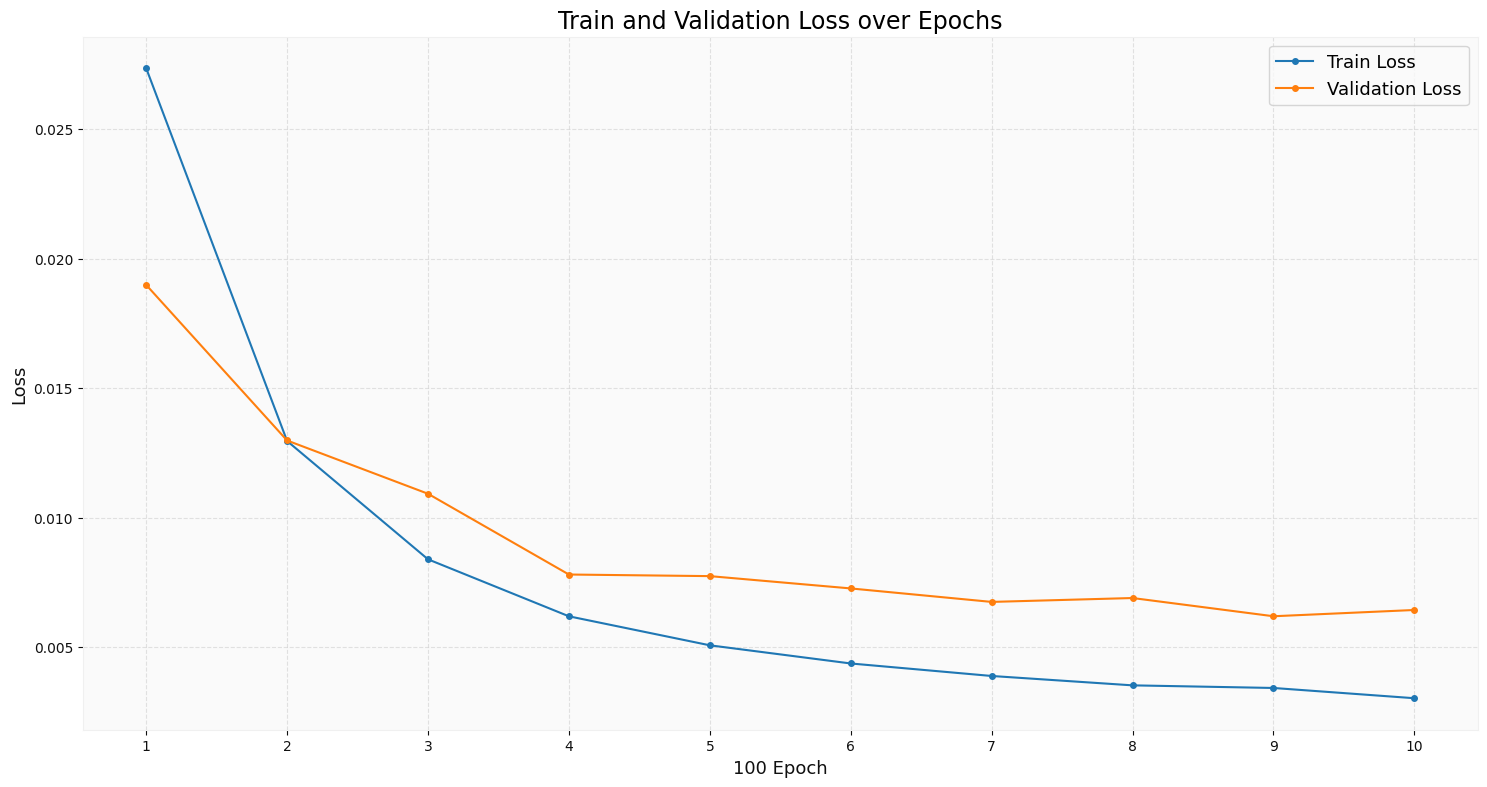

In [29]:
plt.figure(figsize=(18, 9))
plt.plot(range(1,11), history.history['loss'], label='Train Loss', marker='o', markersize=4)
plt.plot(range(1,11), history.history['val_loss'], label='Validation Loss', marker='o', markersize=4)
plt.title("Train and Validation Loss over Epochs", fontsize=17)
plt.xlabel("100 Epoch", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.xticks(range(1,11))
plt.legend(fontsize=13)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## 4-4. Evaluate Model on Test Data

In [30]:
test_loss = model.evaluate(
    x_test,
    y_test,
    verbose = 1
)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0603


In [31]:
print("Test Loss:", test_loss)

Test Loss: 0.06262864917516708


# 5. Visualization of Predicted and Real Prices

In [32]:
def inverse_close(values):
    rescaled_values = []
    for value in values:
        rescaled_value = (min(data['Close']) + ((value[0] + 1) / 2) *  (max(data['Close']) - min(data['Close'])))
        rescaled_values.append(rescaled_value)
    return rescaled_values

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


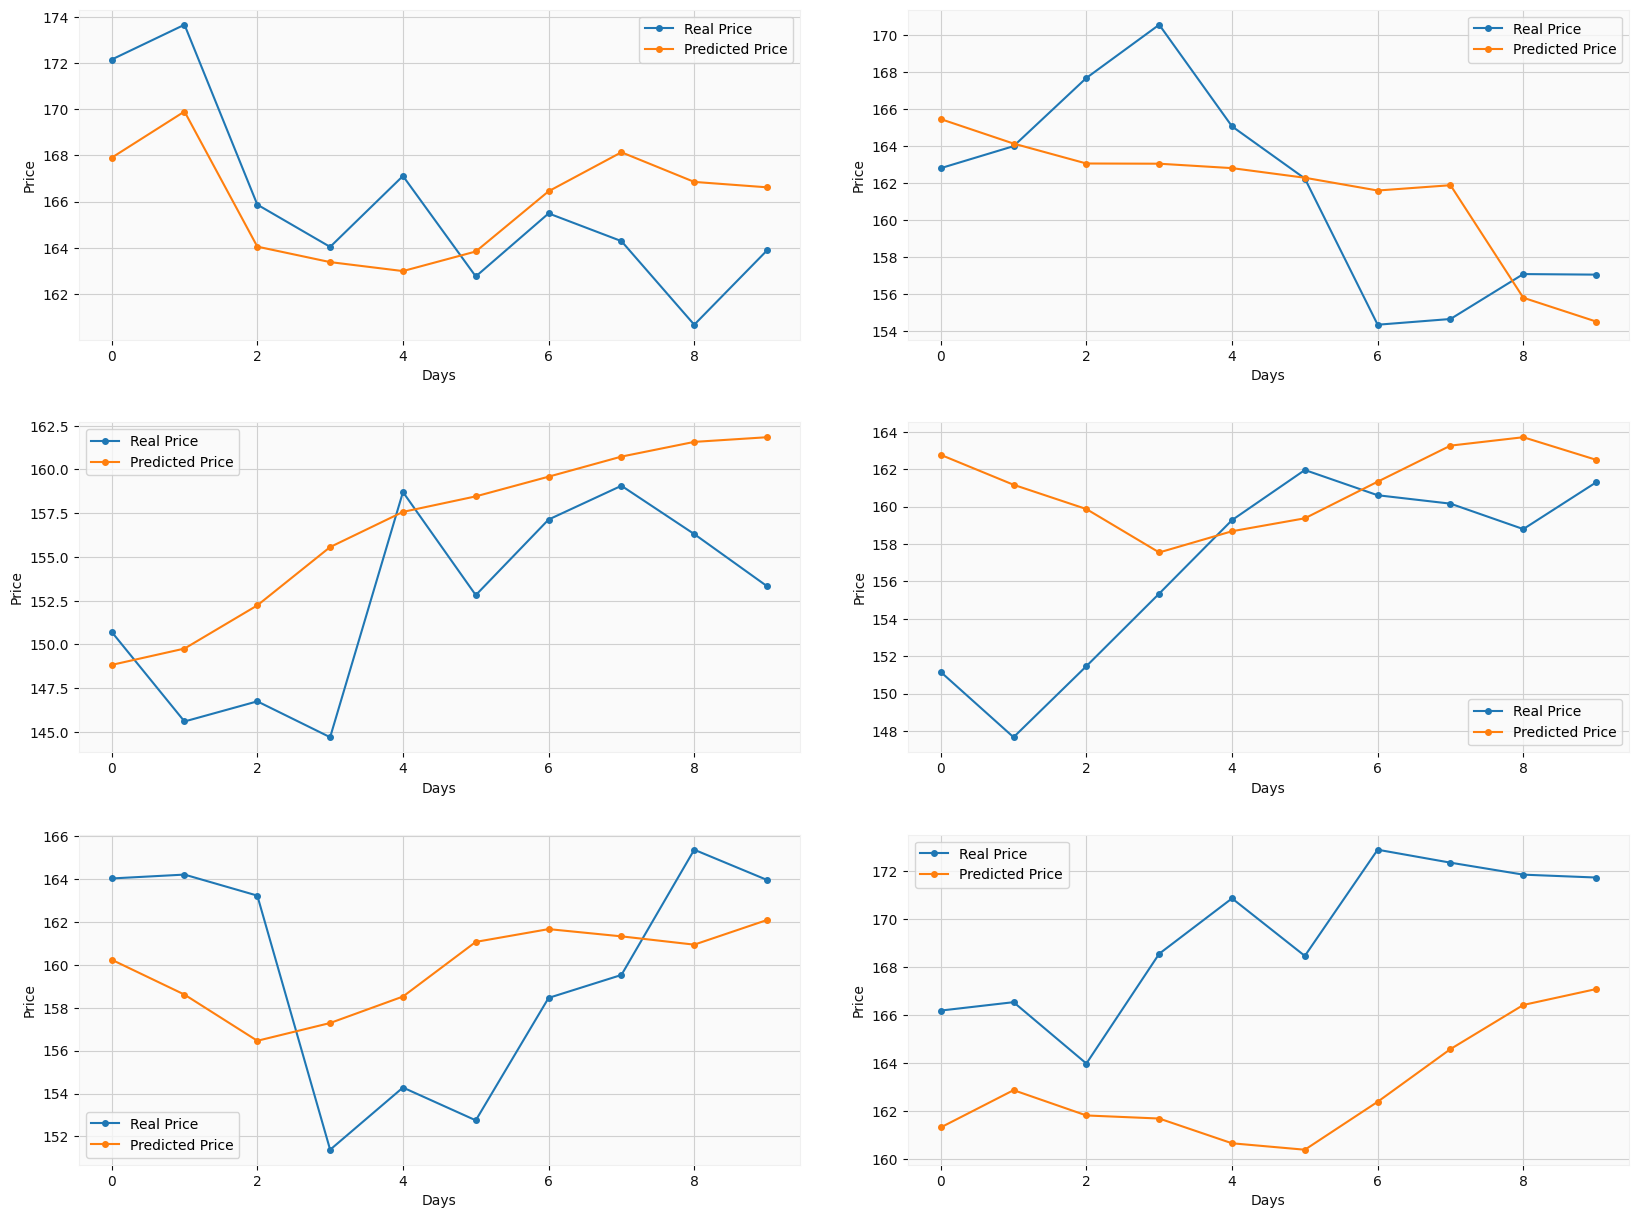

In [33]:
selected_indices = range(7, len(x_test), 10)

plt.figure(figsize=(20, 15))

for i, idx in enumerate(selected_indices):
    
    pred = model.predict(x_test[idx].reshape(1, x_test.shape[1], x_test.shape[2]))
    pred = pred.reshape(pred.shape[1], 1)
    real = y_test[idx].reshape(-1, 1)

    real_rescaled = inverse_close(real)
    pred_rescaled = inverse_close(pred)

    plt.subplot(3, 2, i + 1)
    plt.plot(range(10), real_rescaled, marker='o', markersize=4, label="Real Price")
    plt.plot(range(10), pred_rescaled, marker='o', markersize=4, label="Predicted Price")
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend()

plt.subplots_adjust(hspace=0.25, wspace=0.15)    
plt.show()